## Fit theoretical net photosynthetic rate equation to soybean experimental data, in order to generate synthetic data to be used in net_photosynthetic_rate_curve.ipynb

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

#### Try with simple example ("Use optimize.curve_fit from scipy" from https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html)

In [4]:
x = np.linspace(0, 1, 101)

In [5]:
y = 1 + x + x * np.random.random(len(x))

In [6]:
def func(x, a, b):
    y = a * x + b
    return y

In [7]:
alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]

In [8]:
alpha

array([1.50085551, 0.98900316])

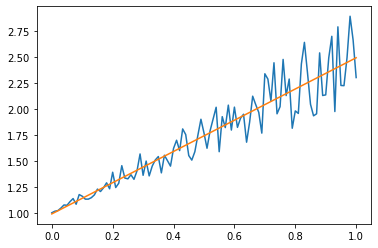

In [11]:
plt.plot(x, y)
plt.plot(x, func(x, alpha[0], alpha[1]))

#### Use net_photosynthetic_rate function

In [33]:
from net_photosynthetic_rate import get_net_photosynthetic_rate_function

In [18]:
soybean_net_photosynthetic_rate = pd.read_csv("../../../data/soybean_net_photosynthetic_rate.csv", 
                    index_col="Photosynthetically Active Radiation [micromol / m^2 / s]")

In [19]:
soybean_net_photosynthetic_rate

,Monocropping - CO2 uptake [micromol / m^2 / s],Intercropping - CO2 uptake [micromol / m^2 / s]
Photosynthetically Active Radiation [micromol / m^2 / s],,
0.0,-3.5,-2.5
25.0,-2.7,-0.7
50.0,-0.9,0.8
75.0,1.0,2.3
100.0,2.0,3.0
200.0,6.0,7.0
400.0,12.5,11.0
600.0,17.0,12.5
800.0,20.0,14.5


In [20]:
soybean_net_photosynthetic_rate.rename(columns ={'Monocropping - CO2 uptake [micromol / m^2 / s]': 'Monocropping', 
                                                 'Intercropping - CO2 uptake [micromol / m^2 / s]': 'Intercropping'},
                               inplace=True)

In [21]:
soybean_net_photosynthetic_rate.index.names = ['PAR']

In [22]:
soybean_net_photosynthetic_rate

,Monocropping,Intercropping
PAR,,
0.0,-3.5,-2.5
25.0,-2.7,-0.7
50.0,-0.9,0.8
75.0,1.0,2.3
100.0,2.0,3.0
200.0,6.0,7.0
400.0,12.5,11.0
600.0,17.0,12.5
800.0,20.0,14.5


In [25]:
xdata = soybean_net_photosynthetic_rate.index.values

In [26]:
ydata = soybean_net_photosynthetic_rate.Monocropping.values

In [27]:
p_max = max(xdata)

In [28]:
p_max

1500.0

In [34]:
net_photosynthetic_rate = get_net_photosynthetic_rate_function(p_max)

In [35]:
popt, pcov = optimize.curve_fit(net_photosynthetic_rate, xdata, ydata)

In [36]:
popt

array([ 1.66546275e-01,  2.84853287e-03, -3.16349545e+02])

In [37]:
pcov

array([[ 2.71350549e-02,  1.29615493e-04, -5.61054739e+01],
       [ 1.29615493e-04,  8.10550567e-07, -2.59135838e-01],
       [-5.61054739e+01, -2.59135838e-01,  1.16674039e+05]])

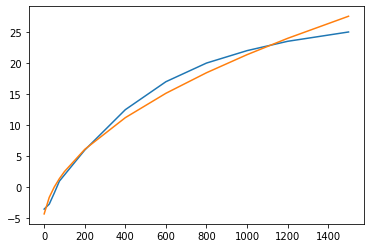

In [42]:
plt.plot(xdata, ydata)
plt.plot(xdata, net_photosynthetic_rate(xdata, popt[0], popt[1], popt[2]))

##### Cannot have value negative or absolute value greater than 1

##### Constrain optimization to the region of 0 < phi, alpha, theta < 1

In [38]:
popt_2, pcov_2 = optimize.curve_fit(net_photosynthetic_rate, xdata, ydata, 
                                    bounds=(0, 1))

In [39]:
popt_2

array([2.07141025e-02, 2.28078265e-10, 9.42610479e-08])

In [40]:
pcov_2

array([[ 5.49430633e-06,  1.60456232e-06, -2.67708855e-05],
       [ 1.60456232e-06,  9.67689527e-07, -4.56363875e-06],
       [-2.67708855e-05, -4.56363875e-06,  7.55104031e-04]])

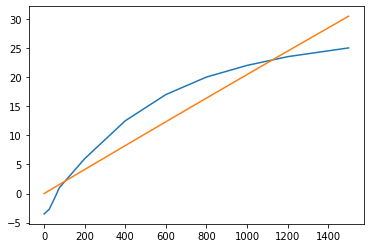

In [41]:
plt.plot(xdata, ydata)
plt.plot(xdata, net_photosynthetic_rate(xdata, popt_2[0], popt_2[1], popt_2[2]))

##### I might have misunderstood p_max. I used max photosynthetic active radiation (as max PPFD). But it seems that it should be max photosynthetic rate. I try with that assumption. 

In [43]:
p_max_2 = max(ydata)

In [48]:
p_max_2

25.0

In [44]:
net_photosynthetic_rate_2 = get_net_photosynthetic_rate_function(p_max_2)

##### Without bounds

In [45]:
popt_3, pcov_3 = optimize.curve_fit(net_photosynthetic_rate_2, xdata, ydata)

/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/agrivoltaics_supply_side_management/notebooks/exploratory_data_analysis/light_saturation_point/net_photosynthetic_rate.py:31: RuntimeWarning: invalid value encountered in sqrt
  return (phi * l + (1 + alpha) * p_max - sqrt(
/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/agrivoltaics_supply_side_management/venv/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [46]:
popt_3

array([nan, nan, nan])

In [47]:
pcov_3

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

##### Investigate it

In [54]:
def inside_sqrt(l, p_max, phi, alpha, theta):
    return (phi * l + (1 + alpha) * p_max)**2 - 4 * theta * phi * l * (1 + alpha) * p_max

In [51]:
phi_1, alpha_1, theta_1 = 0.055, 0.2, 0.96

In [55]:
for l in xdata:
    inside_sqrt_result = inside_sqrt(l, p_max_2, phi_1, alpha_1, theta_1)
    print(f"l: {l}, inside_sqrt_result: {inside_sqrt_result}")

l: 0.0, inside_sqrt_result: 900.0
l: 25.0, inside_sqrt_result: 825.990625
l: 50.0, inside_sqrt_result: 755.7625
l: 75.0, inside_sqrt_result: 689.315625
l: 100.0, inside_sqrt_result: 626.65
l: 200.0, inside_sqrt_result: 413.79999999999995
l: 400.0, inside_sqrt_result: 169.5999999999999
l: 600.0, inside_sqrt_result: 167.4000000000001
l: 800.0, inside_sqrt_result: 407.1999999999998
l: 1000.0, inside_sqrt_result: 889.0000000000009
l: 1200.0, inside_sqrt_result: 1612.8000000000002
l: 1500.0, inside_sqrt_result: 3152.25


##### Put print statement inside net_photosynthetic_rate function

In [57]:
from net_photosynthetic_rate import get_net_photosynthetic_rate_function

In [58]:
net_photosynthetic_rate_3 = get_net_photosynthetic_rate_function(p_max_2)

In [60]:
popt_4, pcov_4 = optimize.curve_fit(net_photosynthetic_rate_3, xdata, ydata)

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], inside_sqrt: [2.50000000e+03 6.24999981e+02 0.00000000e+00 6.25000056e+02
 2.50000015e+03 2.25000009e+04 1.22500004e+05 3.02500010e+05
 5.62500018e+05 9.02500028e+05 1.32250004e+06 2.10250006e+06]
l: [   0.   25.   50.   75.  100.  200.  400.  

/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/agrivoltaics_supply_side_management/notebooks/exploratory_data_analysis/light_saturation_point/net_photosynthetic_rate.py:35: RuntimeWarning: invalid value encountered in sqrt
  


In [61]:
from net_photosynthetic_rate import get_net_photosynthetic_rate_function

In [62]:
net_photosynthetic_rate_4 = get_net_photosynthetic_rate_function(p_max_2)

In [63]:
popt_5, pcov_5 = optimize.curve_fit(net_photosynthetic_rate_4, xdata, ydata)

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0000000149011612, alpha: 1.0, theta: 1.0, inside_sqrt: [2.50000000e+03 6.24999981e+02 0.00000000e+00 6.25000056e+02
 2.50000015e+03 2.2

/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/agrivoltaics_supply_side_management/notebooks/exploratory_data_analysis/light_saturation_point/net_photosynthetic_rate.py:35: RuntimeWarning: invalid value encountered in sqrt
  


In [64]:
from net_photosynthetic_rate import get_net_photosynthetic_rate_function

In [65]:
net_photosynthetic_rate_5 = get_net_photosynthetic_rate_function(p_max_2)

In [66]:
popt_6, pcov_6 = optimize.curve_fit(net_photosynthetic_rate_5, xdata, ydata)

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: [-25.   0.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: [-25.   0.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: 

/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/agrivoltaics_supply_side_management/notebooks/exploratory_data_analysis/light_saturation_point/net_photosynthetic_rate.py:35: RuntimeWarning: invalid value encountered in sqrt
  


In [67]:
inside_sqrt(50, 25, 1.0, 1.0, 1.0000000149011612)

-0.00014901161193847656

##### Temporarily make inside_sqrt 0 if it's negative and see how it goes. 

In [72]:
from net_photosynthetic_rate import get_net_photosynthetic_rate_function

In [73]:
net_photosynthetic_rate_6 = get_net_photosynthetic_rate_function(p_max_2)

In [74]:
popt_7, pcov_7 = optimize.curve_fit(net_photosynthetic_rate_6, xdata, ydata)

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: [-25.   0.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: [-25.   0.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: 

In [75]:
popt_7

array([0.03442842, 0.0951081 , 1.32757914])

In [76]:
pcov_7

array([[1.39549921e-05, 6.13369611e-05, 2.34703763e-04],
       [6.13369611e-05, 6.85653547e-04, 7.02600961e-04],
       [2.34703763e-04, 7.02600961e-04, 5.19480653e-03]])

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 0.03442841710379512, alpha: 0.09510809834054065, theta: 1.327579142408395, inside_sqrt: [749.53859191 672.27420771 596.49146839 522.19037395 449.37092439
 172.90957496   0.           0.           0.           0.
   0.           0.        ]
net_photosynthetic_rate_result: [-2.37770246 -1.50763692 -0.61662158  0.29948203  1.24625225  5.57431963
 13.12008143 15.71340457 18.30672771 20.90005086 23.493374   27.38335871]


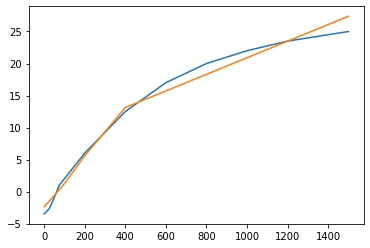

In [77]:
plt.plot(xdata, ydata)
plt.plot(xdata, net_photosynthetic_rate_6(xdata, popt_7[0], popt_7[1], popt_7[2]))

#### Try with the other data (Intercropping)

In [78]:
ydata_intercropping = soybean_net_photosynthetic_rate.Intercropping.values

In [79]:
popt_8, pcov_8 = optimize.curve_fit(net_photosynthetic_rate_6, xdata, ydata_intercropping)

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: [-25.   0.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: [-25.   0.  25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [2.5000e+03 6.2500e+02 0.0000e+00 6.2500e+02 2.5000e+03 2.2500e+04
 1.2250e+05 3.0250e+05 5.6250e+05 9.0250e+05 1.3225e+06 2.1025e+06]
net_photosynthetic_rate_result: 

In [80]:
popt_8

array([ 0.10543238,  0.10907244, -1.5219019 ])

In [81]:
pcov_8

array([[ 4.02531137e-04,  2.49237314e-04, -1.03171283e-02],
       [ 2.49237314e-04,  2.23231738e-04, -5.64725791e-03],
       [-1.03171283e-02, -5.64725791e-03,  2.81006377e-01]])

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 0.1054323842436448, alpha: 0.10907244047636042, theta: -1.5219018990808402, inside_sqrt: [  768.77604889  1366.78689013  1978.69271592  2604.49352627
  3244.18932119  5941.92234643 12004.34765576 18956.05197687
 26797.03530976 35527.29765444 45146.8390109  61243.54919269]
net_photosynthetic_rate_result: [-2.72681101 -0.5560205   1.04612231  2.33264747  3.4127884   6.56109967
 10.30444588 12.61410468 14.23396745 15.45033566 16.40457429 17.51068036]


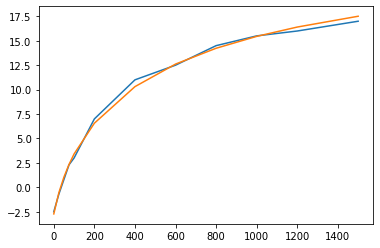

In [82]:
plt.plot(xdata, ydata_intercropping)
plt.plot(xdata, net_photosynthetic_rate_6(xdata, popt_8[0], popt_8[1], popt_8[2]))

##### With p_max from intercropping data

In [83]:
p_max_intercropping = max(ydata_intercropping)

In [84]:
p_max_intercropping

17.0

In [85]:
net_photosynthetic_rate_7 = get_net_photosynthetic_rate_function(p_max_intercropping)

In [86]:
popt_9, pcov_9 = optimize.curve_fit(net_photosynthetic_rate_7, xdata, ydata_intercropping)

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [1.156000e+03 8.100000e+01 2.560000e+02 1.681000e+03 4.356000e+03
 2.755600e+04 1.339560e+05 3.203560e+05 5.867560e+05 9.331560e+05
 1.359556e+06 2.149156e+06]
net_photosynthetic_rate_result: [-17.   8.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [1.156000e+03 8.100000e+01 2.560000e+02 1.681000e+03 4.356000e+03
 2.755600e+04 1.339560e+05 3.203560e+05 5.867560e+05 9.331560e+05
 1.359556e+06 2.149156e+06]
net_photosynthetic_rate_result: [-17.   8.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.]
l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 1.0, alpha: 1.0, theta: 1.0, inside_sqrt: [1.156000e+03 8.100000e+01 2.560000e+02 1.681000e+03 4.356000e+03
 2.755600e+04 1.339560e+05 3.203560e+05 5.867560e+0

In [87]:
popt_9

array([0.05498626, 0.12013631, 0.74425981])

In [88]:
pcov_9

array([[ 6.55406741e-05,  1.77234574e-04, -4.90868988e-04],
       [ 1.77234574e-04,  7.72375137e-04, -9.92244368e-04],
       [-4.90868988e-04, -9.92244368e-04,  5.45902851e-03]])

l: [   0.   25.   50.   75.  100.  200.  400.  600.  800. 1000. 1200. 1500.], phi: 0.05498625745316387, alpha: 0.12013631354448669, theta: 0.7442598071555129, inside_sqrt: [ 784.19085058  748.46934245  716.52719496  688.36440811  663.9809819
  604.24088339  666.1699969   969.9781911  1515.66546601 2303.23182161
 3332.6772579  5330.36868865]
net_photosynthetic_rate_result: [-3.00340784 -1.64642436 -0.32645614  0.95399887  2.19249625  6.68363123
 13.24605329 17.05053646 19.20715964 20.50831984 21.35473402 22.17155101]


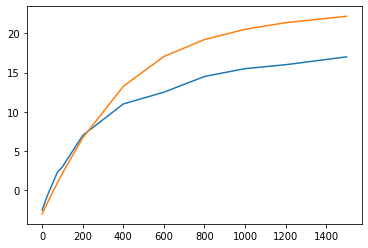

In [89]:
plt.plot(xdata, ydata_intercropping)
plt.plot(xdata, net_photosynthetic_rate_6(xdata, popt_9[0], popt_9[1], popt_9[2]))